<a href="https://colab.research.google.com/github/mchype99/python-notebooks/blob/main/application-of-keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 5

CAP 4613

McKerlton Hyppolite

https://colab.research.google.com/drive/1MmhwaIPc2pEH6wocsNv35BBEfdd4zWKO?usp=sharing

Problem 1) Application of Keras to build, compile, and train a neural network to 
perform XOR operation: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_fun(features,labels,classes):
  plt.plot(features[labels[:]==classes[0],0], features[labels[:]==classes[0],1], 'rs', 
         features[labels[:]==classes[1],0], features[labels[:]==classes[1],1], 'g^',markersize=15)
  #plt.axis([-2,2,-2,2])
  plt.xlabel('x: feature 1')
  plt.ylabel('y: feature 2')
  plt.legend(['Class'+str(classes[0]), 'Class'+str(classes[1])])
  plt.show()

def plot_fun_thr(features,labels,thre_parms,classes):
  #ploting the data points
  plt.plot(features[labels[:]==classes[0],0], features[labels[:]==classes[0],1], 'rs',
           features[labels[:]==classes[1],0], features[labels[:]==classes[1],1], 'g^', 
           markersize=15)
  #plt.axis([-1,2,-1,2])
  #ploting the seperating line
  x1 = np.linspace(-2,2,50)
  x2 = -(thre_parms[0]*x1+thre_parms[2])/thre_parms[1] 
                      #a X1 + b X2 + c=0 --> x2 = -(a X1 + c)/b
  plt.plot(x1, x2, '-r')
  plt.xlabel('x: feature 1')
  plt.ylabel('y: feature 2')
  plt.legend(['Class'+str(classes[0]), 'Class'+str(classes[1])])
  #plt.pause(0.5)
  #plt.show()

def plot_curve(accuracy_train, loss_train):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs,accuracy_train)
  #plt.axis([-1,2,-1,2])
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')

  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train)
  plt.xlabel('Epoch#')
  plt.ylabel('Binary crossentropy loss')
  plt.title('Training loss')

  plt.show()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 2)                 6         
                                                                 
 dense_64 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


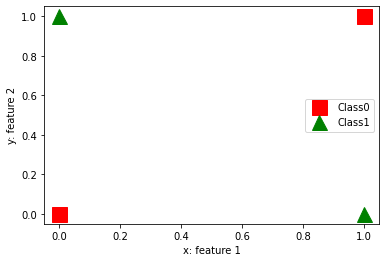

Epoch 1/200
4/4 [==============================] - 1s 8ms/step - loss: 0.7257 - accuracy: 0.7500
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7202 - accuracy: 0.7500
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7151 - accuracy: 0.5000
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7121 - accuracy: 0.7500
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7087 - accuracy: 0.7500
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7050 - accuracy: 0.7500
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 0.7039 - accuracy: 0.7500
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7013 - accuracy: 0.7500
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6992 - accuracy: 0.7500
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.7500
Epoch 11/200
4/4 [===========

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

#defining the model
model_a=Sequential()
model_a.add(Dense(input_dim=2, units=2, activation='tanh'))
model_a.add(Dense(units=1, activation='sigmoid'))
model_a.summary()

#compiling the model
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model_a.compile(loss='binary_crossentropy',
              optimizer=opt, 
              metrics=['accuracy'])

#Loading the data and normalization
features=np.array([[0,0], [0,1], [1,0], [1,1]])
labels=np.array([0,1,1,0], dtype=np.uint8)
classes=[0,1]

# Data normalization is essential for multilayer networks
# You can experiment with and without data normalization and observe the model behavior
#features = (features-np.mean(features,axis=0))/np.std(features,axis=0) #normalization
plot_fun(features,labels,classes)

history=model_a.fit(features, labels,
          batch_size=1,
          epochs=200,
          verbose=1)

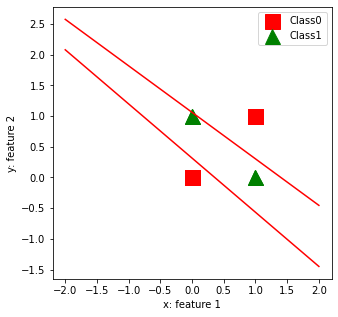

In [ ]:
weights=model_a.layers[0].get_weights() 
plt.figure(figsize=[5,5])
for node_i in range(weights[0].shape[1]):
  thre_parms=np.array(weights[0][:,node_i])#This first item is the weights for the inputs 
  thre_parms=np.append(thre_parms, weights[1][node_i]) #second item the weights for the bias
  plot_fun_thr(features,labels,thre_parms,classes)
plt.show()

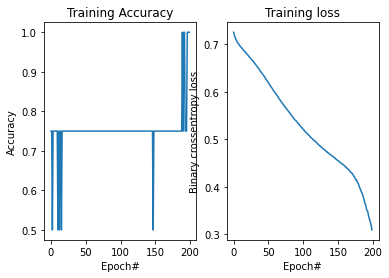

In [ ]:
acc_curve=np.array(history.history['accuracy'])
loss_curve=np.array(history.history['loss'])
plot_curve(acc_curve,loss_curve)

Problem 2) Application of Keras to build, compile, and train a neural network as a 
three-class classifier for MNIST dataset (0 vs. 1 vs. 2): 

11501568/11490434 [==============================] - 0s 0us/step
Samples of the training images


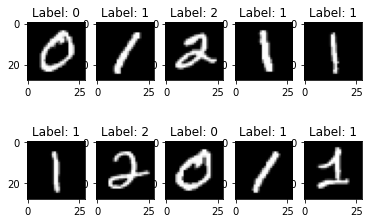

Samples of the testing images


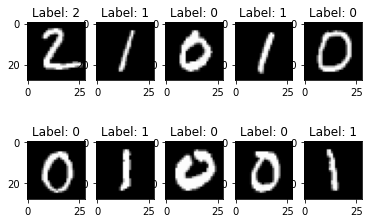

Samples of the validation images


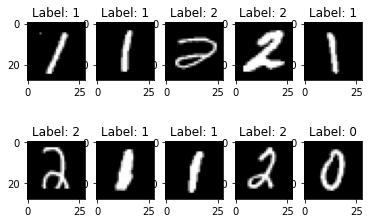

Plotting the features of 500 training images: 


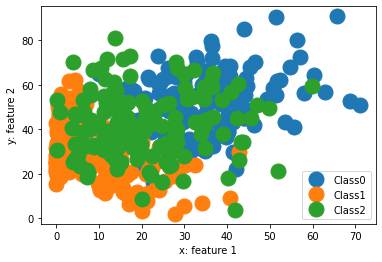

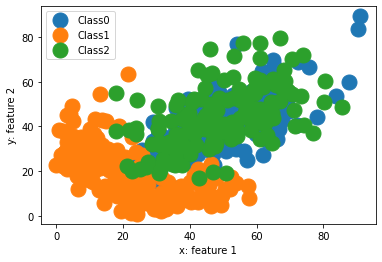

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from random import randint

def img_plt(images, labels):
  plt.figure()
  for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(images[i-1,:,:],cmap='gray')
    plt.title('Label: ' + str(labels[i-1]))
  plt.show()

def feat_extract(images):
  width=images.shape[1]
  height=images.shape[2]
  features=np.zeros((images.shape[0],4))
  features_temp=np.sum(images[:,0:int(width/2),0:int(height/2)],axis=2)#quadrant 0
  features[:,0]=np.sum(features_temp,axis=1)/(width*height/4)
  features_temp=np.sum(images[:,0:int(width/2),int(height/2):],axis=2) #quadrant 1
  features[:,1]=np.sum(features_temp,axis=1)/(width*height/4)
  features_temp=np.sum(images[:,int(width/2):,0:int(height/2)],axis=2) #quadrant 2
  features[:,2]=np.sum(features_temp,axis=1)/(width*height/4)
  features_temp=np.sum(images[:,int(width/2):,int(height/2):],axis=2)  #quadrant 3
  features[:,3]=np.sum(features_temp,axis=1)/(width*height/4)
  return features

def feat_plot(features,labels,classes):
  for class_i in classes:
    plt.plot(features[labels[:]==classes[class_i],0], 
             features[labels[:]==classes[class_i],1],'o', markersize=15)
  #plt.axis([-2,2,-2,2])
  plt.xlabel('x: feature 1')
  plt.ylabel('y: feature 2')
  plt.legend(['Class'+str(classes[class_i]) for class_i in classes])
  plt.show()

def acc_fun(labels_actual, labels_pred):
  acc=np.sum(labels_actual==labels_pred)/len(labels_actual)*100
  return acc

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Selecting only 0 and 1 digits from the training and testing sets
classes=[0,1,2]
x_train_012=x_train[np.logical_or.reduce((y_train==0,y_train==1,y_train==2)),0:28,0:28]
y_train_012=y_train[np.logical_or.reduce((y_train==0,y_train==1,y_train==2))]
print('Samples of the training images')
img_plt(x_train_012[0:10,:,:],y_train_012[0:10])

x_test_012=x_test[np.logical_or.reduce((y_test==0,y_test==1,y_test==2)),0:28,0:28]
y_test_012=y_test[np.logical_or.reduce((y_test==0,y_test==1,y_test==2))]
print('Samples of the testing images')
img_plt(x_test_012[0:10,:,:],y_test_012[0:10])

#Selecting 500 images from training data as the validation set
#shuffling trainig data
num_train_img=x_train_012.shape[0]
train_ind=np.arange(0,num_train_img)
train_ind_s=np.random.permutation(train_ind)
x_train_012=x_train_012[train_ind_s,:,:]
y_train_012=y_train_012[train_ind_s]
#Selecting 500 images for validation
x_val_012=x_train_012[0:500,:,:]
y_val_012=y_train_012[0:500]
#The rest of the training set
x_train_012=x_train_012[500:,:,:]
y_train_012=y_train_012[500:]
print('Samples of the validation images')
img_plt(x_val_012[0:10,:,:],y_val_012[0:10])

#Calculating the training, validation and testing feature (average of the four quadrants grid)
feature_train=feat_extract(x_train_012)
feature_val=feat_extract(x_val_012)
feature_test=feat_extract(x_test_012)

print('Plotting the features of 500 training images: ')
feat_plot(feature_train[1:500, 0:2],y_train_012[1:500], classes)
feat_plot(feature_train[1:500, 2:4],y_train_012[1:500], classes) 
#The combination between the features could be changed

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 100)               500       
                                                                 
 dense_66 (Dense)            (None, 3)                 303       
                                                                 
Total params: 803
Trainable params: 803
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1133/1133 [==============================] - 2s 2ms/step - loss: 0.7970 - accuracy: 0.6946
Epoch 2/50
1133/1133 [==============================] - 2s 1ms/step - loss: 0.5994 - accuracy: 0.7914
Epoch 3/50
1133/1133 [==============================] - 2s 1ms/step - loss: 0.5226 - accuracy: 0.8326
Epoch 4/50
1133/1133 [==============================] - 2s 1ms/step - loss: 0.4823 - accuracy: 0.8471
Epoch 5/50
1133/1133 [=====================

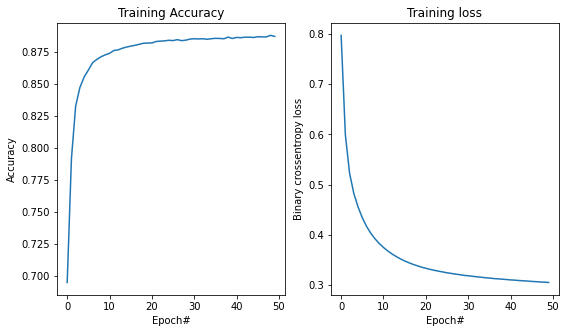

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

def plot_curve(accuracy_train, loss_train):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs,accuracy_train)
  #plt.axis([-1,2,-1,2])
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')

  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train)
  plt.xlabel('Epoch#')
  plt.ylabel('Binary crossentropy loss')
  plt.title('Training loss')
  plt.show()

#defining the model
model_a=Sequential()
model_a.add(Dense(input_dim=4, units=100, activation='tanh'))
#model_a.add(Dense(units=50, activation='tanh'))
model_a.add(Dense(units=len(classes), activation='softmax'))
model_a.summary()

opt = tf.keras.optimizers.SGD(learning_rate=0.0001)
model_a.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# convert class vectors to binary class matrices
from keras.utils.np_utils import to_categorical
y_train_012_c = to_categorical(y_train_012, len(classes))
y_val_012_c = to_categorical(y_val_012, len(classes))
y_test_012_c = to_categorical(y_test_012, len(classes))

history=model_a.fit(feature_train, y_train_012_c,
          batch_size=16,
          epochs=50,
          verbose=1)

#Evaluating the model on the training samples
score=model_a.evaluate(feature_train,y_train_012_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])

#Evaluating the model on the validation samples
score=model_a.evaluate(feature_val,y_val_012_c)
print('Total loss on validation set: ', score[0])
print('Accuracy of validation set: ', score[1])

plt.figure(figsize=[9,5])
acc_curve=np.array(history.history['accuracy'])
loss_curve=np.array(history.history['loss'])
plot_curve(acc_curve,loss_curve)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
#Evaluating the model on the held-out samples
score=model_a.evaluate(feature_test,y_test_012_c)
print('Total loss on testing set: ', score[0])
print('Accuracy of testing set: ', score[1])

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
#predicting the class of the held-out samples
test_class1_prob=model_a.predict(feature_test)
test_lab=np.argmax(test_class1_prob,axis=1)
print('The accuracy using the testing set: ', 
      accuracy_score(test_lab,y_test_012))
conf_mat=confusion_matrix(test_lab,y_test_012)
print('The confusion matrix using testing set: \n', 
      conf_mat)

99/99 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8773
Total loss on testing set:  0.32484522461891174
Accuracy of testing set:  0.877343475818634
The accuracy using the testing set:  0.8773435017476963
The confusion matrix using testing set: 
 [[ 891   39  175]
 [   7 1051   38]
 [  82   45  819]]


Problem 3) Application of Keras to build, compile, and train a neural network to 
classify songs from Spotify dataset. 

In [ ]:
#IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing

In [ ]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#DATASET
#Importing training data
spotify = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spotify_preprocessed.csv',
                      header = 0, index_col = 0)
spotify.head()

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,,,,,,,,,,,,,,,
0.738790,0.626533,0.090909,0.899432,0.0,0.070809,0.020080,0.00000,0.068476,0.723361,0.400098,0.093080,0.8,0.193225,0.093023,1.0
0.418807,0.247058,0.454545,0.687954,0.0,0.012962,0.874498,0.81809,0.080700,0.256148,0.676658,0.086266,0.6,0.155665,0.081395,0.0
0.530910,0.415269,0.818182,0.862211,0.0,0.031601,0.161647,0.00000,0.094582,0.280738,0.773251,0.103036,0.8,0.210605,0.081395,1.0
0.478668,0.648560,0.000000,0.880682,0.0,0.032351,0.005151,0.00000,0.194033,0.298156,0.305743,0.095749,0.8,0.138515,0.058140,0.0
0.810623,0.887860,0.090909,0.919516,1.0,0.270487,0.003825,0.00000,0.387755,0.799180,0.705958,0.067117,0.8,0.117248,0.069767,1.0


In [ ]:
classes = [0,1]

#Convert to np array
spotify = spotify.reset_index().values
spotify_data = spotify[:,:-1]
label = spotify[:,[-1]]

#Split Dataset
spotify_count = spotify.shape[0]

train_count = int(0.8*spotify_count)
valid_count = int(0.1*spotify_count)
test_count = spotify_count - train_count - valid_count

#train:
train_data = spotify_data[:train_count]
train_labels = label[:train_count]

#validation
valid_data = spotify_data[train_count:train_count+valid_count]
valid_labels = label[train_count:train_count+valid_count]

#test
test_data = spotify_data[train_count+valid_count:]
test_labels = label[train_count+valid_count:]

print(f'Total samples: {len(spotify)} \nTraining samples: {np.sum(train_count)} \nTesting samples: {np.sum(test_count)} \nValidation samples: {np.sum(valid_count)}')



Total samples: 6398 
Training samples: 5118 
Testing samples: 641 
Validation samples: 639


In [ ]:
print(test_labels[0])

[0.]


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 150)               2400      
                                                                 
 dense_61 (Dense)            (None, 50)                7550      
                                                                 
 dense_62 (Dense)            (None, 2)                 102       
                                                                 
Total params: 10,052
Trainable params: 10,052
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
320/320 [==============================] - 1s 2ms/step - loss: 0.5657 - accuracy: 0.7198
Epoch 2/50
320/320 [==============================] - 1s 2ms/step - loss: 0.4818 - accuracy: 0.7610
Epoch 3/50
320/320 [==============================] - 1s 2ms/step - loss: 0.4587 - accuracy: 0.7786
Epoch 4/50
32

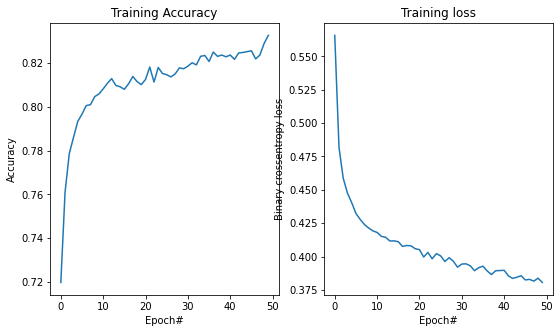

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

def plot_curve(accuracy_train, loss_train):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs,accuracy_train)
  #plt.axis([-1,2,-1,2])
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')

  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train)
  plt.xlabel('Epoch#')
  plt.ylabel('Binary crossentropy loss')
  plt.title('Training loss')
  plt.show()

#defining the model
model_a=Sequential()
model_a.add(Dense(input_dim=15, units=150, activation='relu'))
model_a.add(Dense(units=50, activation='relu'))
model_a.add(Dense(units=len(classes), activation='softmax'))
model_a.summary()

opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model_a.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Convert to binary class matrix
from keras.utils.np_utils import to_categorical
train_labels_c = to_categorical(train_labels, len(classes))
valid_labels_c = to_categorical(valid_labels, len(classes))
test_labels_c = to_categorical(test_labels, len(classes))

#plot_fun(train_data_c, train_labels, classes)

history=model_a.fit(train_data, train_labels_c, 
          batch_size=16,
          epochs=50,
          verbose=1)

#Evaluating the model on the training samples
score=model_a.evaluate(train_data,train_labels_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])

#Evaluating the model on the validation samples
score=model_a.evaluate(valid_data,valid_labels_c)
print('Total loss on validation set: ', score[0])
print('Accuracy of validation set: ', score[1])

plt.figure(figsize=[9,5])
acc_curve=np.array(history.history['accuracy'])
loss_curve=np.array(history.history['loss'])
plot_curve(acc_curve,loss_curve)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
#Evaluating the model on the held-out samples
score=model_a.evaluate(test_data,test_labels_c)
print('Total loss on testing set: ', score[0])
print('Accuracy of testing set: ', score[1])

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
#predicting the class of the held-out samples
test_class1_prob=model_a.predict(test_data)
test_lab=np.argmax(test_class1_prob,axis=1)
print('The accuracy using the testing set: ', 
      accuracy_score(test_lab,test_labels))
conf_mat=confusion_matrix(test_lab,test_labels)
print('The confusion matrix using testing set: \n', 
      conf_mat)

21/21 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.8128
Total loss on testing set:  0.42738640308380127
Accuracy of testing set:  0.8127925395965576
The accuracy using the testing set:  0.8127925117004681
The confusion matrix using testing set: 
 [[251  38]
 [ 82 270]]
